<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj16-zomato?scriptVersionId=192787901" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Zomato</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset provides extensive information on restaurants listed on Zomato, focusing on various attributes that could influence customer choice, such as availability of online delivery, table booking, location, and restaurant type. The dataset is ideal for performing exploratory data analysis, visualization, and regression modeling to uncover insights into restaurant operations and customer preferences. This project will provide valuable insights into the restaurant industry, particularly in Bengaluru, by uncovering patterns and trends that can be leveraged for business strategies.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install category_encoders

In [3]:
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rishikeshkonapure/zomato
!unzip zomato.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rishikeshkonapure/zomato
License(s): CC0-1.0
 85%|█████████████████████████████████▎     | 76.0M/89.0M [00:00<00:00, 114MB/s]
100%|███████████████████████████████████████| 89.0M/89.0M [00:00<00:00, 109MB/s]
Archive:  zomato.zip
  inflating: zomato.csv              


In [5]:
df = pd.read_csv("zomato.csv").copy()

# **Take a look at the data**
---

In [6]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [7]:
df.tail(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [8]:
df.shape

(51717, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# **Data Cleaning**
---

**Drop Unnecessary Columns**

In [10]:
df.drop(['url','phone','address','reviews_list','menu_item'], axis=1, inplace=True)

**Formatting**

In [11]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype('float')

In [12]:
def convert_rating(rating_str):
    if isinstance(rating_str, str) and '/5' in rating_str:
        return float(rating_str.split('/')[0])
    else:
        return np.NaN

df['rate'] = df['rate'].apply(convert_rating)

In [13]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [14]:
df = df.replace(['', 'None', 'NA','NaN','-999'], np.nan)

In [15]:
df['online_order'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)
df['book_table'] = df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)

**Handling Duplicate Rows**

In [16]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
df = df.drop_duplicates()

Number of duplicate rows: 108


**Handling Missing Data**

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
dish_liked,28014,0.542812
rate,10019,0.194133
approx_cost(for two people),344,0.006666
rest_type,227,0.004398
cuisines,45,0.000872
location,21,0.000407
name,0,0.000000
online_order,0,0.000000
book_table,0,0.000000
votes,0,0.000000


In [18]:
df.drop(['dish_liked'], axis=1, inplace=True)

In [19]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)
df['cuisines'].fillna(df['cuisines'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)

In [20]:
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 10019


The remaining null values are in the rate column. We'll address this later, after encoding categorical features during the preprocessing stage.

# **Exploratory Data Analysis**
---

In [21]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [22]:
df.select_dtypes(include='object').describe()

,name,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,51609,51609,51609,51609,51609,51609
unique,8792,93,93,2723,7,30
top,Cafe Coffee Day,BTM,Quick Bites,North Indian,Delivery,BTM
freq,96,5130,19323,2952,25867,3266


In [23]:
df['approx_cost(for two people)'].describe()

count    51609.000000
mean       555.170682
std        437.123484
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

**Univariate Analysis**

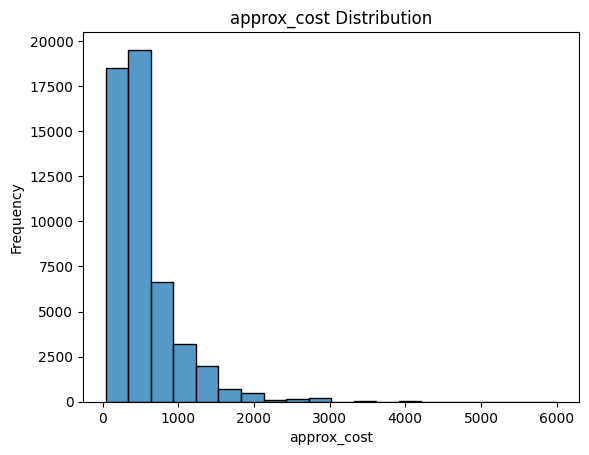

In [24]:
sns.histplot(df['approx_cost(for two people)'], bins=20)
plt.xlabel('approx_cost')
plt.ylabel('Frequency')
plt.title('approx_cost Distribution')
plt.show()

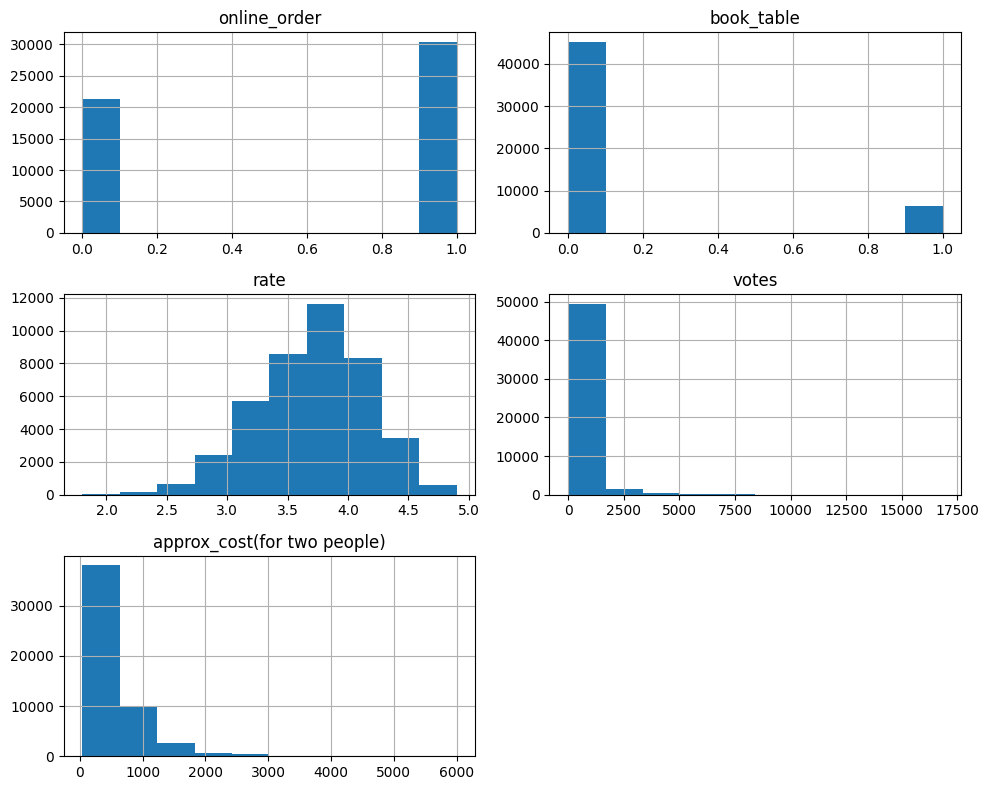

In [25]:
numerical_data = df.select_dtypes(include='number')

numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

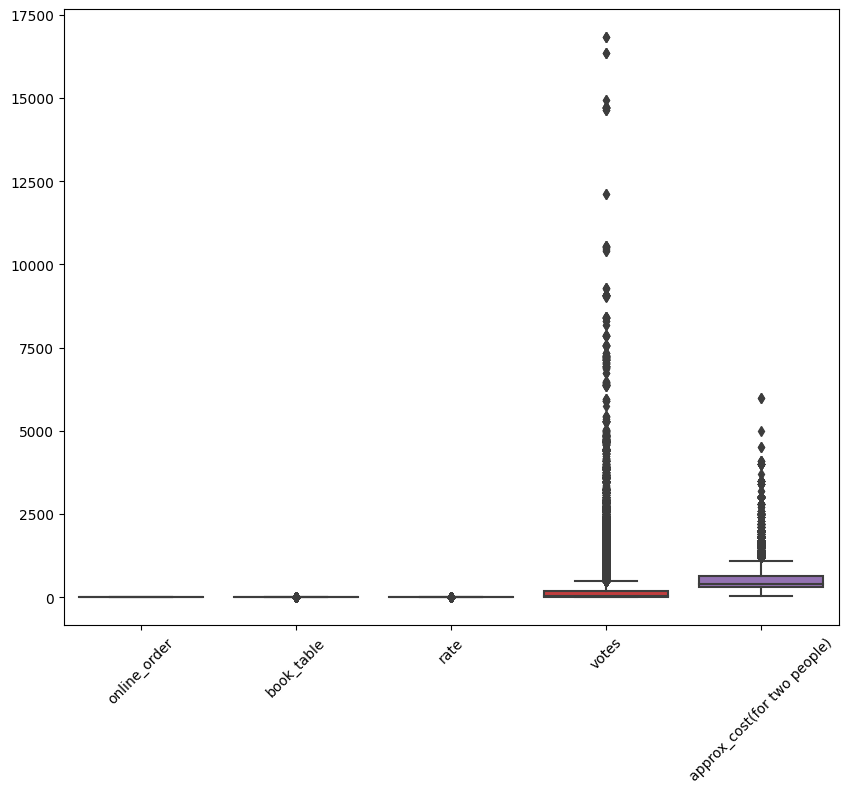

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.xticks(rotation=45)
plt.show()

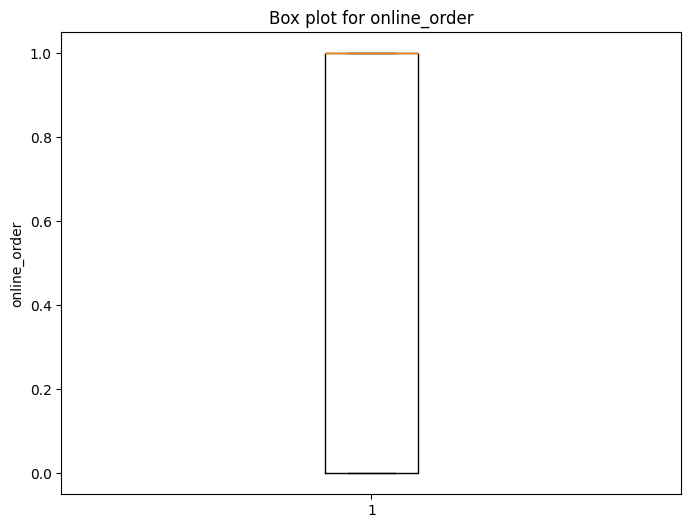

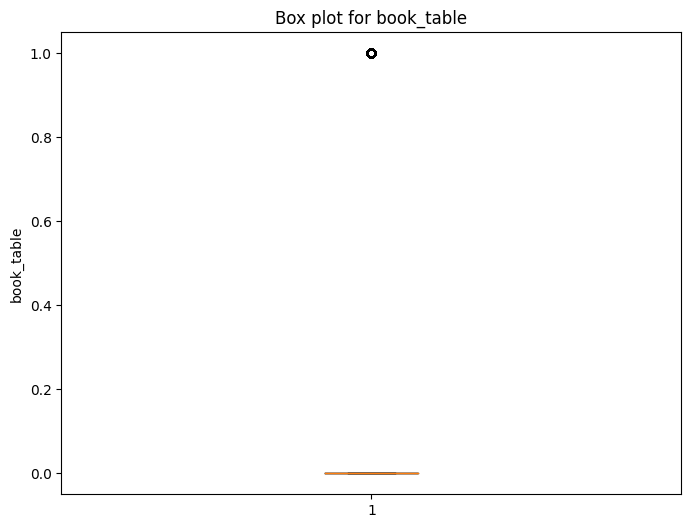

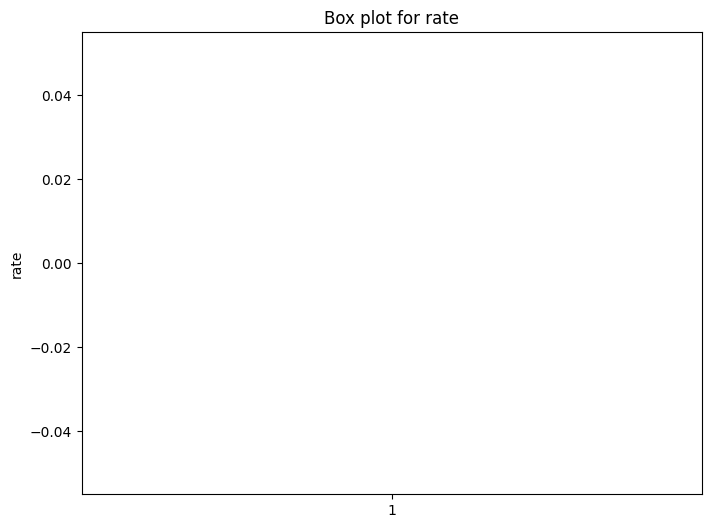

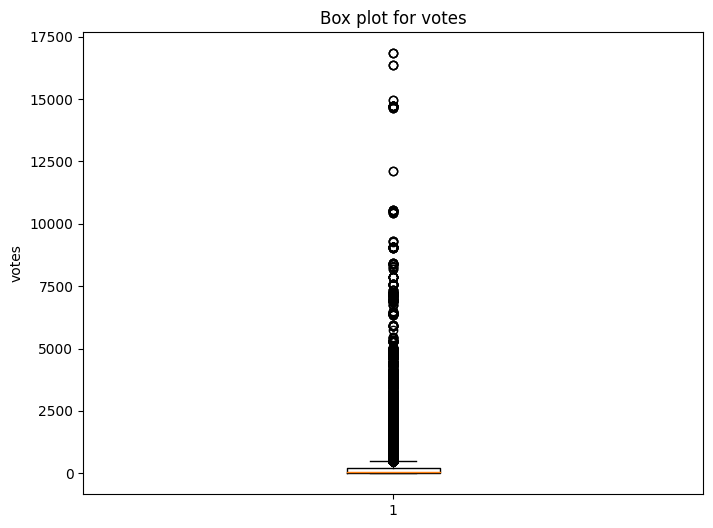

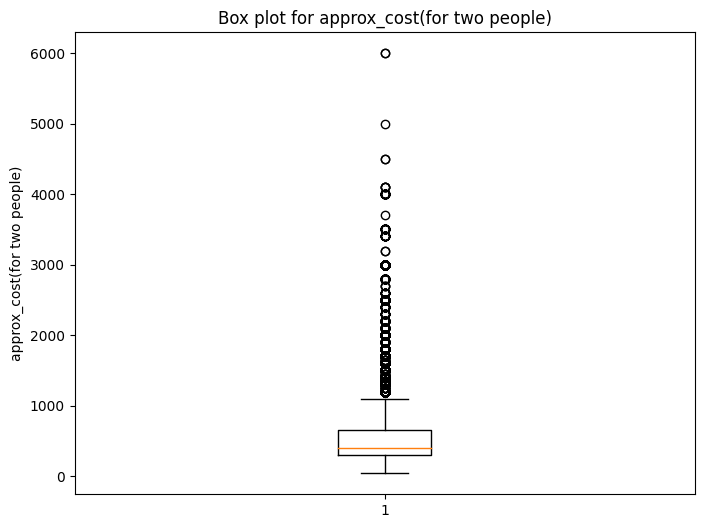

In [27]:
for col in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(numerical_data[col])
    plt.title(f'Box plot for {col}')
    plt.ylabel(col)
    plt.show()

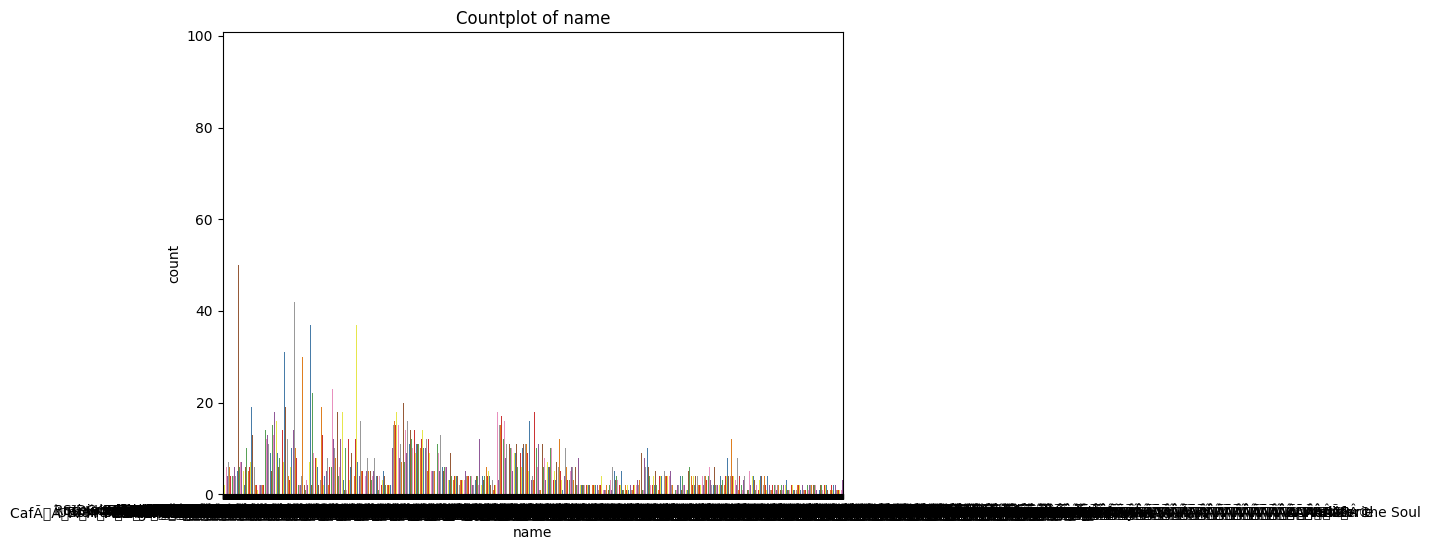

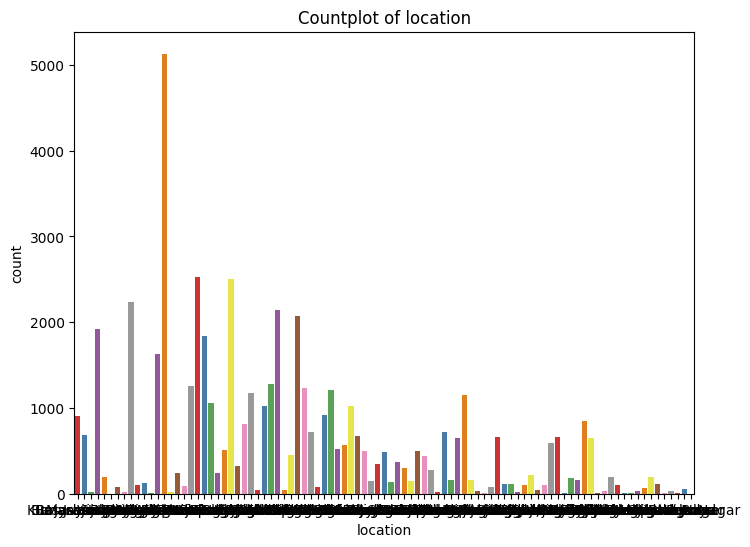

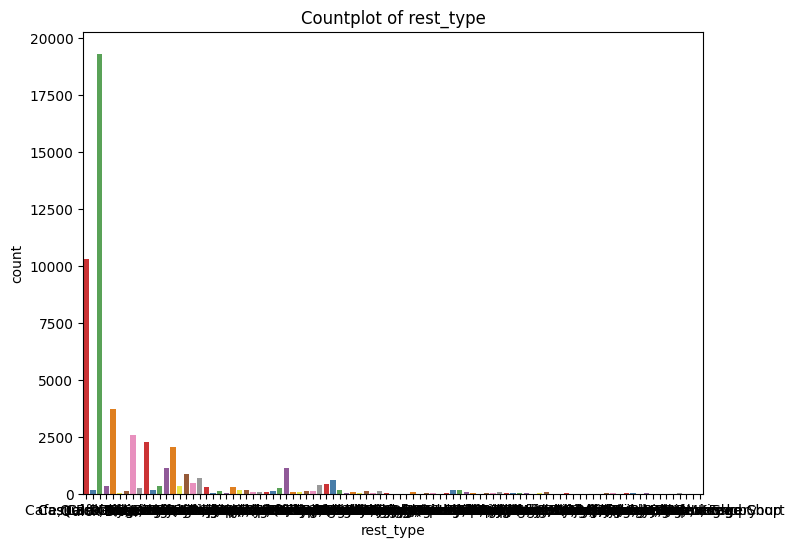

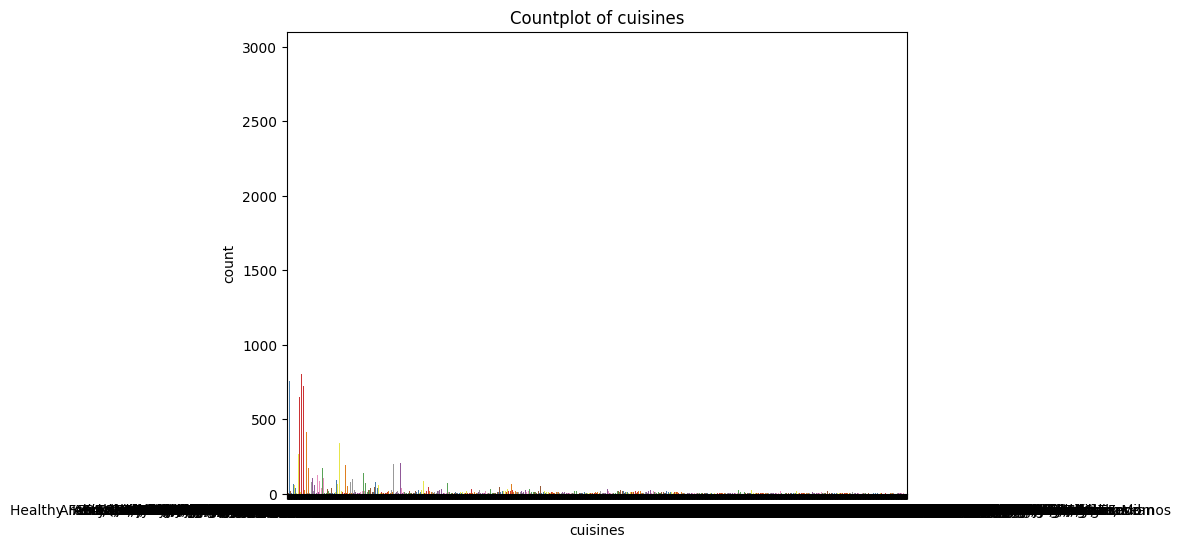

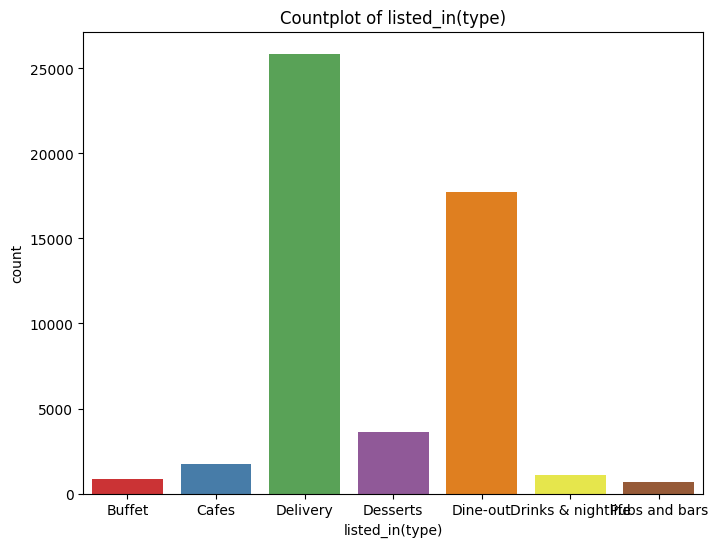

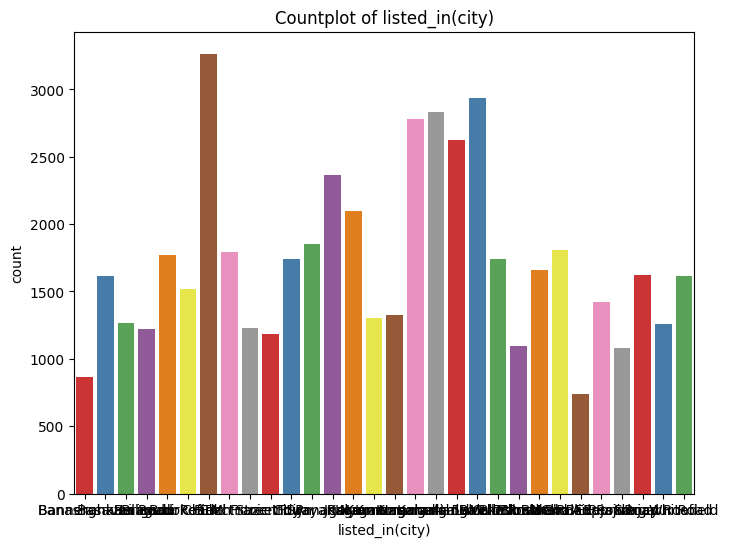

In [28]:
categorical_data = df.select_dtypes(exclude='number')
for column in categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

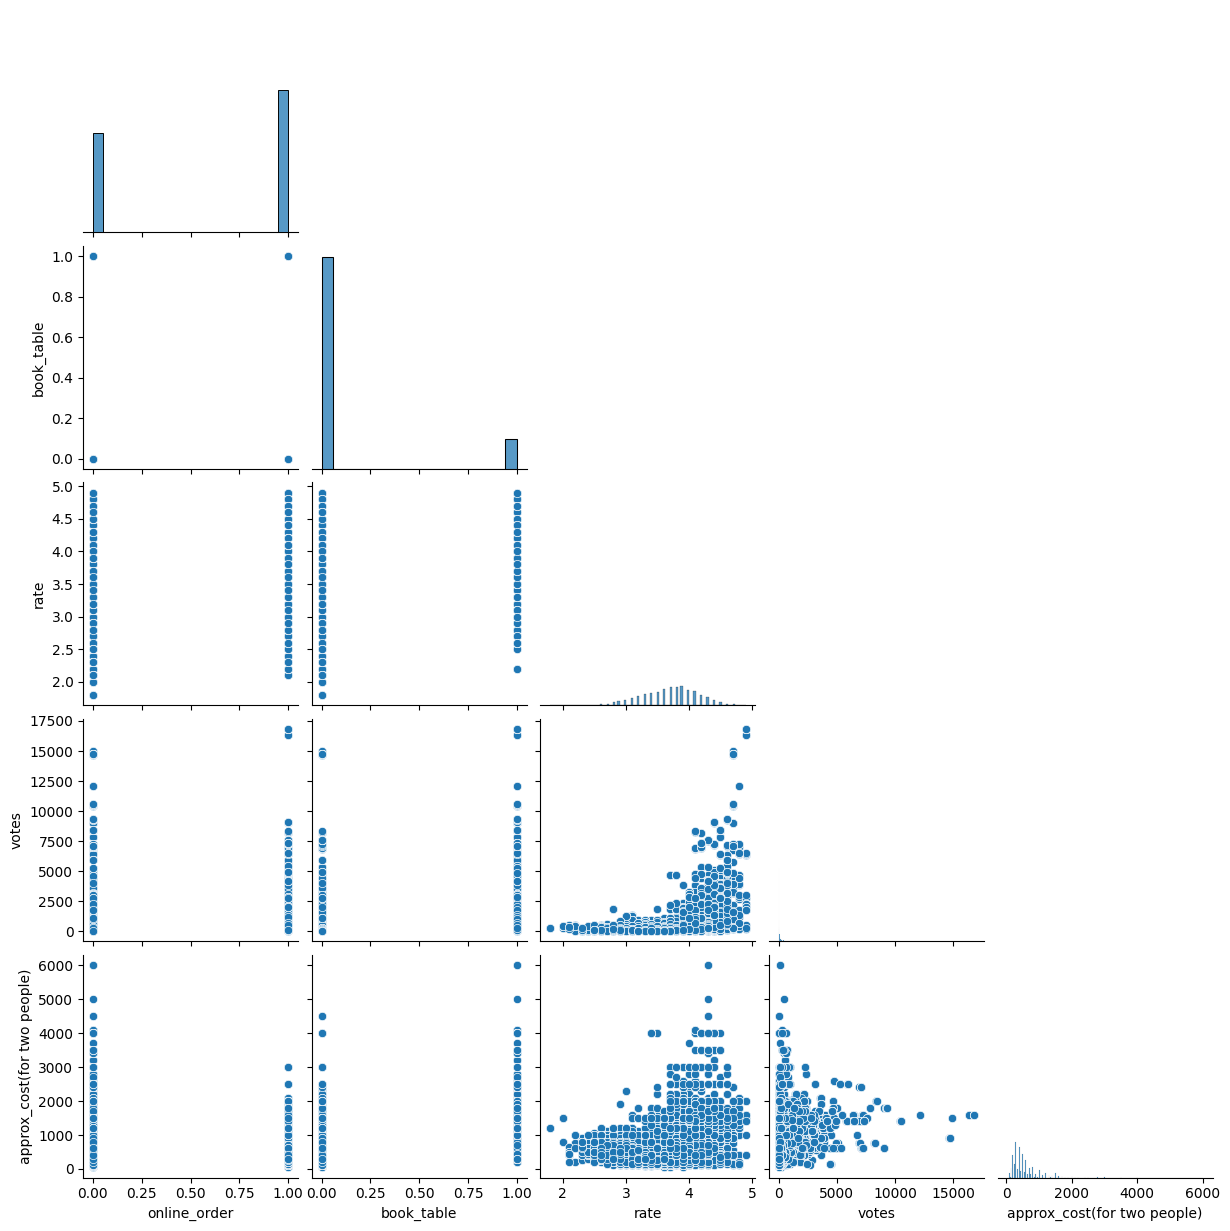

In [29]:
sns.pairplot(df,corner = True)
plt.show()

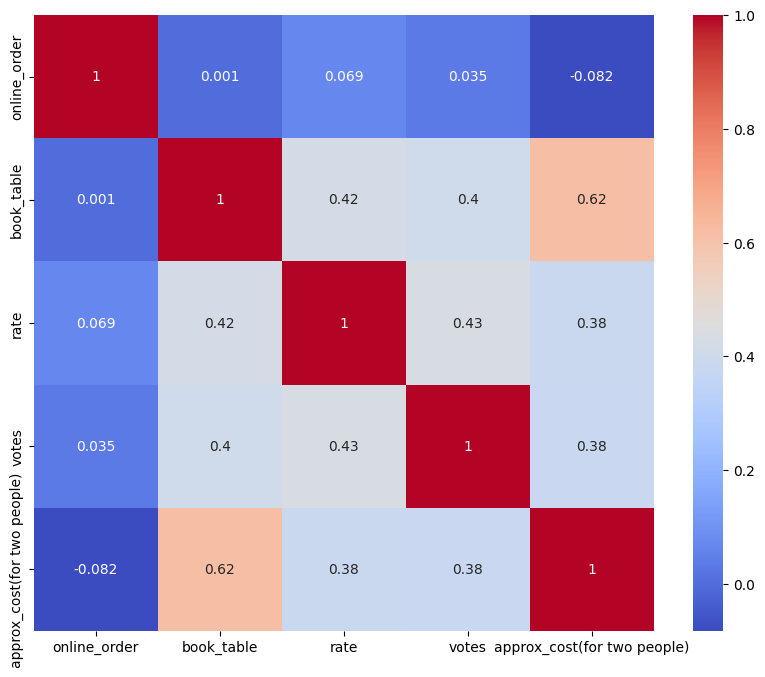

In [30]:
corr = df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [31]:
categorical_data.head(10)

,name,location,rest_type,cuisines,listed_in(type),listed_in(city)
0,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Spice Elephant,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari
2,San Churro Cafe,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari
3,Addhuri Udupi Bhojana,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Banashankari
4,Grand Village,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari
5,Timepass Dinner,Basavanagudi,Casual Dining,North Indian,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",Buffet,Banashankari
7,Onesta,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",Cafes,Banashankari
8,Penthouse Cafe,Banashankari,Cafe,"Cafe, Italian, Continental",Cafes,Banashankari
9,Smacznego,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",Cafes,Banashankari


In [32]:
df.describe(include='object')

,name,location,rest_type,cuisines,listed_in(type),listed_in(city)
count,51609,51609,51609,51609,51609,51609
unique,8792,93,93,2723,7,30
top,Cafe Coffee Day,BTM,Quick Bites,North Indian,Delivery,BTM
freq,96,5130,19323,2952,25867,3266


In [33]:
df.drop(['name'], axis=1, inplace=True)
df.drop(['cuisines'], axis=1, inplace=True)

In [34]:
encoder = BinaryEncoder()
df = encoder.fit_transform(df)

In [35]:
df.head(10)

,online_order,book_table,rate,votes,location_0,location_1,location_2,location_3,location_4,location_5,...,rest_type_6,approx_cost(for two people),listed_in(type)_0,listed_in(type)_1,listed_in(type)_2,listed_in(city)_0,listed_in(city)_1,listed_in(city)_2,listed_in(city)_3,listed_in(city)_4
0,1,1,4.1,775,0,0,0,0,0,0,...,1,800.0,0,0,1,0,0,0,0,1
1,1,0,4.1,787,0,0,0,0,0,0,...,1,800.0,0,0,1,0,0,0,0,1
2,1,0,3.8,918,0,0,0,0,0,0,...,0,800.0,0,0,1,0,0,0,0,1
3,0,0,3.7,88,0,0,0,0,0,0,...,1,300.0,0,0,1,0,0,0,0,1
4,0,0,3.8,166,0,0,0,0,0,1,...,1,600.0,0,0,1,0,0,0,0,1
5,1,0,3.8,286,0,0,0,0,0,1,...,1,600.0,0,0,1,0,0,0,0,1
6,0,0,3.6,8,0,0,0,0,0,1,...,1,800.0,0,0,1,0,0,0,0,1
7,1,1,4.6,2556,0,0,0,0,0,0,...,0,600.0,0,1,0,0,0,0,0,1
8,1,0,4.0,324,0,0,0,0,0,0,...,1,700.0,0,1,0,0,0,0,0,1
9,1,0,4.2,504,0,0,0,0,0,0,...,1,550.0,0,1,0,0,0,0,0,1


**Remaining cleaning step**

In [36]:
from sklearn.linear_model import LinearRegression

# Separate data into train/test for imputation
train = df[df['rate'].notnull()]
test = df[df['rate'].isnull()]

# Features and target
X_train = train.drop('rate', axis=1)
y_train = train['rate']
X_test = test.drop('rate', axis=1)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and fill missing values
df.loc[df['rate'].isnull(), 'rate'] = model.predict(X_test)

In [37]:
df.isnull().sum().sum()

0

**Skewness Handling**

In [38]:
df= np.log1p(df)

**Data splitting**

In [39]:
X = df.drop(['approx_cost(for two people)'], axis=1)
y = df['approx_cost(for two people)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.125,random_state=44)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=.5,random_state=44)

**Data Normalization**

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# **Modeling**
-----

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as XGB

In [42]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42)),
    ('Lasso Regression', Lasso(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42))
]

In [43]:
for reg_name, reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
    print(f'{reg_name}:')
    print("Cross Val Score: ", cv_scores.mean())
    print('R2 Score: ', r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print('------------------------------------')

Linear Regression:
Cross Val Score:  0.4924449312178346
R2 Score:  0.490941533548097
MSE:  0.21174366441253892
MAE:  0.3548406213536963
------------------------------------
Ridge Regression:
Cross Val Score:  0.49244494771718283
R2 Score:  0.490942103138303
MSE:  0.21174342749060288
MAE:  0.3548402750337647
------------------------------------
Lasso Regression:
Cross Val Score:  -0.0004167118948560589
R2 Score:  -0.0003900269525569655
MSE:  0.4161137946002649
MAE:  0.5137842446226364
------------------------------------
Decision Tree Regressor:
Cross Val Score:  0.8290532966224593
R2 Score:  0.8645795628104166
MSE:  0.05632834241365021
MAE:  0.09046054097329308
------------------------------------
Random Forest Regressor:
Cross Val Score:  0.9005187376189919
R2 Score:  0.915979784043071
MSE:  0.034948340090389045
MAE:  0.10619780928861286
------------------------------------
K-Nearest Neighbors Regressor:
Cross Val Score:  0.685284701744197
R2 Score:  0.6842943065618808
MSE:  0.1313182

# **DNN**
-----

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.losses import MeanSquaredError

2024-08-15 17:56:37.988753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 17:56:37.988881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 17:56:38.116512: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [45]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='linear'))

In [46]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [47]:
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[R2Score])

In [48]:
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[ES,RL])

Epoch 1/150
 66/706 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5715 - r2_score: -20.0380 

I0000 00:00:1723744616.067253     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6705 - r2_score: -5.1414

W0000 00:00:1723744622.501315     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


706/706 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 2.6686 - r2_score: -5.1372 - val_loss: 1.5906 - val_r2_score: -2.6194 - learning_rate: 0.0010
Epoch 2/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5779 - r2_score: -0.3604 - val_loss: 0.4443 - val_r2_score: -0.0110 - learning_rate: 0.0010
Epoch 3/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4167 - r2_score: 0.0040 - val_loss: 0.2674 - val_r2_score: 0.3915 - learning_rate: 0.0010
Epoch 4/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3529 - r2_score: 0.1562 - val_loss: 0.2113 - val_r2_score: 0.5191 - learning_rate: 0.0010
Epoch 5/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3173 - r2_score: 0.2540 - val_loss: 0.1953 - val_r2_score: 0.5556 - learning_rate: 0.0010
Epoch 6/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3029 - r2_score: 0.2935 - val_loss: 0.1495 - val_r2_score: 0.6598 - learning_rate: 0.0010
Epoch 7/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2790 - r2_score: 0.3482 -

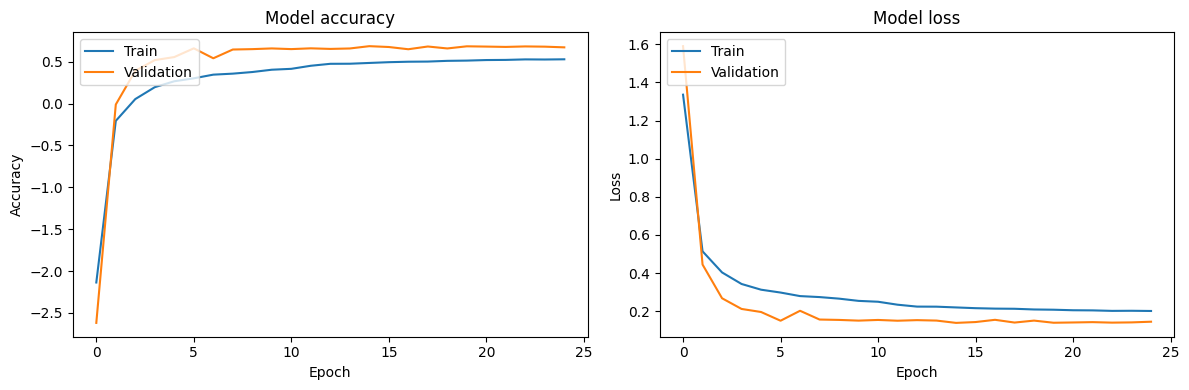

In [49]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [50]:
model.evaluate(X_test,y_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1429 - r2_score: 0.6522


W0000 00:00:1723744665.869047     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.13997703790664673, 0.663499116897583]